# Question 1 - Cross-Correlation

The cross-correlation of two functions $f(x)$ and $g(x)$ is defined as
$$(f \ast g)(y) = \int f(x)g(x + y)dx$$

Similarly to the convolution, it is straightforward to show that this can be evaluated using Fourier transforms as
$$FT(f \ast g) = FT(f)\ast\overline{FT(g)}$$
where $FT$ indicates a Fourier transform and the overbar indicates the complex conjugate.

## **a)** Proof

Imagine that we have the values of two functions $f$ and $g$ defined on a grid in $x$ with $n$ grid points. The integral defining the cross-correlation becomes a sum in this discrete case.

### **Show that there are $2n - 1$ possible values of $y$ at which $f \ast g$ can be evaluated.**

On a grid of $n$ points in $x$, $x$ can take values from $0 \rightarrow n-1$. Since $g(x - y)$ is only defined when $x - y$ is within the range of grid points for $x$, that is, when $0 \leq x - y \leq (n-1)$. This means that on one side, $y$ is bounded by the maximum value of $x$:
$$ 0 \leq x - y \\
\rightarrow 0 \leq (n - 1) - y \\
\rightarrow -(n - 1) \leq -y \\
\rightarrow (n - 1) \geq y$$

and the other side of y is bounded by the minimum value for $x$:
$$ x - y \leq (n - 1) \\
\rightarrow 0 - y \leq (n - 1) \\
\rightarrow -y \leq (n - 1) \\
\rightarrow y \geq -(n - 1)\\
$$

Therefore, the possible values for $y$ range from $-(n-1) \rightarrow (n-1)$.
$$ n - 1 - (- (n - 1)) = n - 1 - (-n + 1) = n - 1 + n - 1  = 2n - 2$$
But we must also include 0 as a possible state of y:
$$2n - 2 + 1 = 2n - 1$$
Therefore, there are $2n - 1$ possible values for $y$.

**Write a function that evaluates the sum and returns the vector containing the $2n - 1$ values of $f\ast g$.**

 In general, the value for $y$ will be determined by the value for $x$ in order to keep $x - y$ within the range of x:
$$ 0 \leq x - y\\
(0 - x) \leq -y\\
-x \leq -y\\
x \geq y\\
$$
and
$$ x - y \leq (n - 1) \\
-y \leq (n - 1 - x) \\
y \geq -(n - 1 - x) \\
y \geq (-n + 1 + x)
$$
So, in general:
$$(-n + 1 + x) \leq y \leq x$$

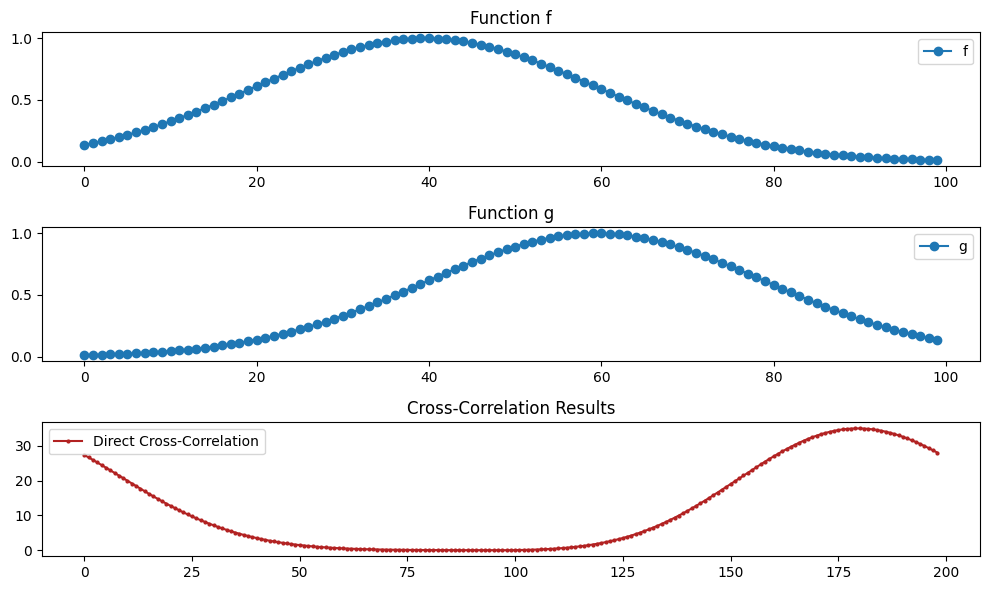

The length of f is 100, so 2n - 1 = 199
The length of the cross-correlation result is 199


In [65]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def cross_correlation(f, g):
    '''
    This function computes the cross-correlation of two signals f and g.
    Inputs:
        f: a 1D numpy array
        g: a 1D numpy array
    Output:
        result: a 1D numpy array of length 2n - 1, where n is the length of f    
    '''
    # Initialize the parameters
    n = len(f)
    m = len(g)

    result = np.zeros(2 * n - 1)
    x_vals = np.arange(0, n) # x ranges from -(n-1) to n-1

    # Compute the cross-correlation
    for y in range(-(n-1), n): # y ranges from -(n-1) to n-1
        sum_val = 0
        
        for x in range(max(0, y), min(n, n + y)): # Only sum over the indices where f and g overlap
            # max(0, y): when y is negative, x should start at 0
            # min(n, n + y): when y is positive, x should end at n
            
            sum_val += f[x] * g[x - y]

        result[y + (n-1)] = sum_val
    
    # Shift the results array to account for the non-monotonic ordering of y
    result = np.roll(result, n)

    return result

# Example usage:
n = 100
m = 100

L = 5
x_f = np.linspace(0, L, n)
x_g = np.linspace(0, L, m)
f = gaussian(x_f, 1, 2, 1)  # Gaussian function centered at 2
g = gaussian(x_g, 1, 3, 1)  # Gaussian function centered at 3

result = cross_correlation(f, g)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(f, 'o-', label='f')
plt.legend()
plt.title('Function f')

plt.subplot(3, 1, 2)
plt.plot(g, 'o-', label='g')
plt.legend()
plt.title('Function g')

plt.subplot(3, 1, 3)
plt.plot(result, 'o-', color = "firebrick", ms = 2, label='Direct Cross-Correlation')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

print(f'The length of f is {n}, so 2n - 1 = {2*n-1}')
print('The length of the cross-correlation result is', len(result))

## **b)** Implementation with Fourier Transforms

**Implement the cross-correlation using the Fourier transform**.

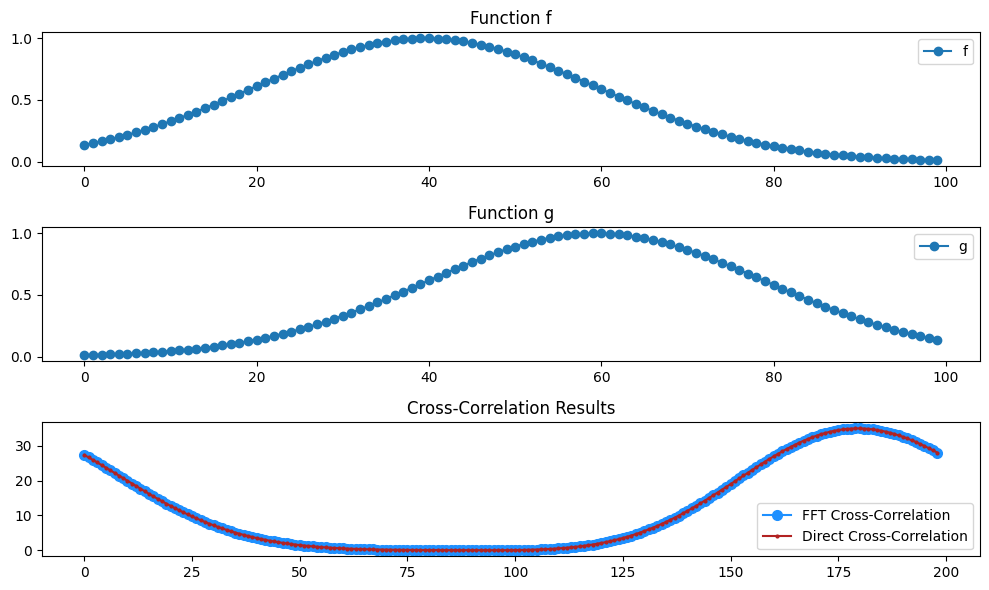

The length of f is 100, so 2n - 1 = 199
The length of the cross-correlation result is 199


In [45]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def cross_correlation_fft(f, g):
    # Zero-pad the vectors to ensure 2n-1 values in the result
    n = len(f)
    m = len(g)

    padded_length = n + m - 1 # 2n - 1

    # Compute the FFT of the padded vectors
    F_f = np.fft.fft(f, n = padded_length)
    F_g = np.fft.fft(g, n = padded_length)
    conj_F_g = np.conjugate(F_g)

    # Compute the product in the frequency domain
    cross_correlation_freq = F_f * conj_F_g

    # Inverse FFT to get back to the time domain
    cross_correlation_time = np.fft.ifft(cross_correlation_freq)

    # Take the real part (imaginary part should be very close to zero)
    result = np.real(cross_correlation_time)

    return result

# Example usage:
n = 100
m = 100

L = 5
x_f = np.linspace(0, L, n)
x_g = np.linspace(0, L, m)
f = gaussian(x_f, 1, 2, 1)  # Gaussian function centered at 2
g = gaussian(x_g, 1, 3, 1)  # Gaussian function centered at 3

result_fft = cross_correlation_fft(f, g)
result_direct = cross_correlation(f, g)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(f, 'o-', label='f')
plt.legend()
plt.title('Function f')

plt.subplot(3, 1, 2)
plt.plot(g, 'o-', label='g')
plt.legend()
plt.title('Function g')

plt.subplot(3, 1, 3)
plt.plot(result_fft, 'o-', color = "dodgerblue", ms = 7, label='FFT Cross-Correlation')
plt.plot(result_direct, 'o-', color = "firebrick", ms = 2, label='Direct Cross-Correlation')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

print(f'The length of f is {n}, so 2n - 1 = {2*n-1}')
print('The length of the cross-correlation result is', len(result_fft))

## **c)** No Padding

**Repeat part b) without zero-padding the DFTs.**

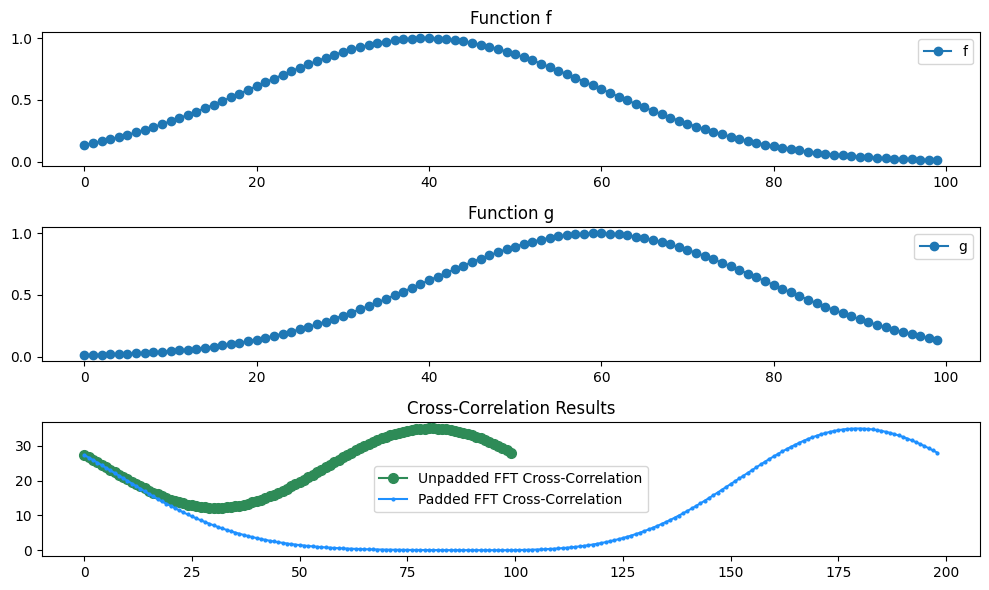

The length of f is 100, so 2n - 1 = 199
The length of the cross-correlation result is 199
The length of the circular cross-correlation result is 100


In [48]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def circular_cross_correlation_fft(f, g):
    n = len(f)
    m = len(g)

    # Compute the FFT of the un-padded vectors
    F_f = np.fft.fft(f)
    F_g = np.fft.fft(g)

    # Compute the product in the frequency domain
    cross_correlation_freq = F_f * np.conj(F_g)

    # Inverse FFT to get back to the time domain
    cross_correlation_time = np.fft.ifft(cross_correlation_freq)

    # Take the real part (imaginary part should be very close to zero)
    result = np.real(cross_correlation_time)

    return result

# Example usage:
n = 100
m = 100

L = 5
x_f = np.linspace(0, L, n)
x_g = np.linspace(0, L, m)
f = gaussian(x_f, 1, 2, 1)  # Gaussian function centered at 2
g = gaussian(x_g, 1, 3, 1)  # Gaussian function centered at 3

result_fft = cross_correlation_fft(f, g)
result_circular_fft = circular_cross_correlation_fft(f, g)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(f, 'o-', label='f')
plt.legend()
plt.title('Function f')

plt.subplot(3, 1, 2)
plt.plot(g, 'o-', label='g')
plt.legend()
plt.title('Function g')

plt.subplot(3, 1, 3)
plt.plot(result_circular_fft, 'o-', color = "seagreen", ms = 7, label='Unpadded FFT Cross-Correlation')
plt.plot(result_fft, 'o-', color = "dodgerblue", ms = 2, label='Padded FFT Cross-Correlation')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

print(f'The length of f is {n}, so 2n - 1 = {2*n-1}')
print('The length of the cross-correlation result is', len(result_fft))
print('The length of the circular cross-correlation result is', len(result_circular_fft))

**What difference does it make?**

When you don't zero-pad the DFTs before computing the cross-correlation using FFT, the convolution can only compare the correlation of the functions without any shift. Normally, cross-correlation takes two signals and shifts them by one each time, calculating the correlation point-by-point for each shift. In the case of the two gaussians, they are identical and so for some shift value should match perfectly. However, if there is no padding, there is no room in the array for the two gaussians to shift left or right relative to each other, and so we only get the correlation for the original, unshifted positions.

**What part of the cross-correlation function is computed in this case?**

The cross-correlation that is computed when there is zero padding is the immediate correlation of f with g without any shifting. That is why there is only 100 points, as this is the range $0 \rightarrow n-1$ that I provided it, and it is doing a 1-to-1 correlation between the two functions.

# Question 2 - Diffusion with Chebyshev Polynomials

Solve the diffusion equation
$$\frac{\partial f}{\partial t} = \frac{\partial^2f}{\partial x^2}$$
for $f(x)$ between $x = 0$ and $1$ with boundary conditions $f(\pm 1) = 0$. You should use a spectral method based on Chebyshev polynomials. That is, write $f(x)$ as a series of Chebyshev polynomials
$$f(x) = \sum_i a_i(t)T_i(x)$$
where $T_i(x)$ is the *i*th Chebyshev polynomial and $a_i(t)$ are the coefficients that you evolve in time.

As a test problem:
- Take the initial $f(x)$ to be the Green's Function for the diffusion equation evaluated at an initial time $t = t_0$ and evolve it forwards in time, comparing with the analytic solution. 
- Check how the error compared to the analytic solution depends on the number of modes that you include in your Chebyshev series.
- Comment on how the scaling compares with what you would expect from finite differences.


Notes:
- You can fit a Chebyshev series to your initial $f(x)$ using np.polynomial.chebyshev.chebfit
- You should use an even number of polynomials in your Chebyshev series
- Once you have the initial coefficients $a_i$, you can evolve them in time with a first order explicit Euler update
- To calculate $\frac{da_i}{dt}$, you can use np.polynomial.chebyshev.chebder to obtain coefficients of a Chebyshev series representing the second derivative $\frac{\partial^2 f}{\partial x^2}$
- To enforce the boundary conditions initially and after each timestep, you can use the last two $a_i$ values to set the sum of the even $a_i$ coefficients and the odd $a_i$ coefficients to zero.
- Set the coefficients to zero if they become too small, e.g. set $a_i = 0$ if $a_i$ drops below $10^{-10}$

First, we can visually compare the diffusion process between the numerical (Chebychev Polynomial) approximation and the Analytical solutions at each time step. This is shown in the graphs below for 4000 timesteps.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

def gaussian(x, x0, t, D):
    # Green's function for the diffusion equation
    return np.exp(-(x-x0)**2/(4*D*t)) / np.sqrt(4*np.pi*D*t)

def greens_bounded(x, x0, t, D):
    # Green's function for the diffusion equation with zero boundary conditions at x=-1,+1
    f = gaussian(x, x0, t, D)
    f -= gaussian(x, -1-(1+x0), t, D)
    f -= gaussian(x, 1+(1-x0), t, D)
    return f

def enforce_bc(a):
    """
    Enforce the boundary conditions on the Chebyshev coefficients.

    Parameters:
    - a: Chebyshev coefficients.

    Returns:
    - Chebyshev coefficients with boundary conditions enforced.
    """
    # Sum up all the even and odd a_i coefficients
    a_even_sum = 0
    a_odd_sum = 0
    for i in range(len(a) - 2):
        if i % 2 == 0:
            a_even_sum += a[i]
        else:
            a_odd_sum += a[i]

    a[-2] = -a_even_sum # Set the second-to-last a_i to be the negative of a_even
    a[-1] = -a_odd_sum # Set the last a_i to be the negative of a_odd

    return a

def evolve_coefficients(a, dt):
    """
    Evolve Chebyshev coefficients using a first-order explicit Euler update.

    Parameters:
    - a: Chebyshev coefficients.
    - dt: Time step.
    - D: Diffusion coefficient.
    - N: Number of Chebyshev modes.

    Returns:
    - Updated Chebyshev coefficients.
    """
    da_dt = chebyshev.chebder(a, 2) # Calculate the second derivative using Chebyshev differentiation

    a[:-2] = a[:-2] + dt * da_dt # Update coefficients using first-order explicit Euler method
    a = enforce_bc(a) # Enforce boundary conditions
    
    a[np.abs(a) < 1e-10] = 0 # Set coefficients to zero if they become too small

    return a

def solve_diffusion_equation(x, dx, N, timesteps = 4000):
    """
    Solve the diffusion equation using Chebyshev spectral method.

    Parameters:
    - N: Number of Chebyshev modes (even).

    Returns:
    - f_values: Array of numerical solutions at different time steps.
    - a_values: Array of Chebyshev coefficients at different time steps.
    """
    t0 = 0.01 # Initial time
    x0 = 0.2 # Initial position
    D = 2  # Diffusion coefficient
    dt = 0.00001  # Time step

    f_init = greens_bounded(x, x0, t0, D)  # Initial condition
    
    a = np.polynomial.chebyshev.chebfit(x, f_init, N)
    a = enforce_bc(a)

    a_values = list(np.zeros(timesteps))
    f_values = []
    analytical_values = []

    for i in range(timesteps):
        # Evolve coefficients in time using the explicit Euler method
        a = evolve_coefficients(a, dt)
        #a_values[i] = a

        # Calculate the numerical solution at each time step
        f = chebyshev.chebval(x, a)
        f_values.append(f)

        # Calculate the analytic solution at each time step
        analytical_values.append(greens_bounded(x, x0, t0 + i*dt, D))

    return f_init, f_values, analytical_values


# Set parameters
N = 11  # Number of Chebyshev modes
x = np.linspace(-1, 1, 1000)
dx = 0.00001
timesteps = 4000 

# Solve the diffusion equation
f_init, f_values, analytical_values = solve_diffusion_equation(x, dx, N, timesteps)

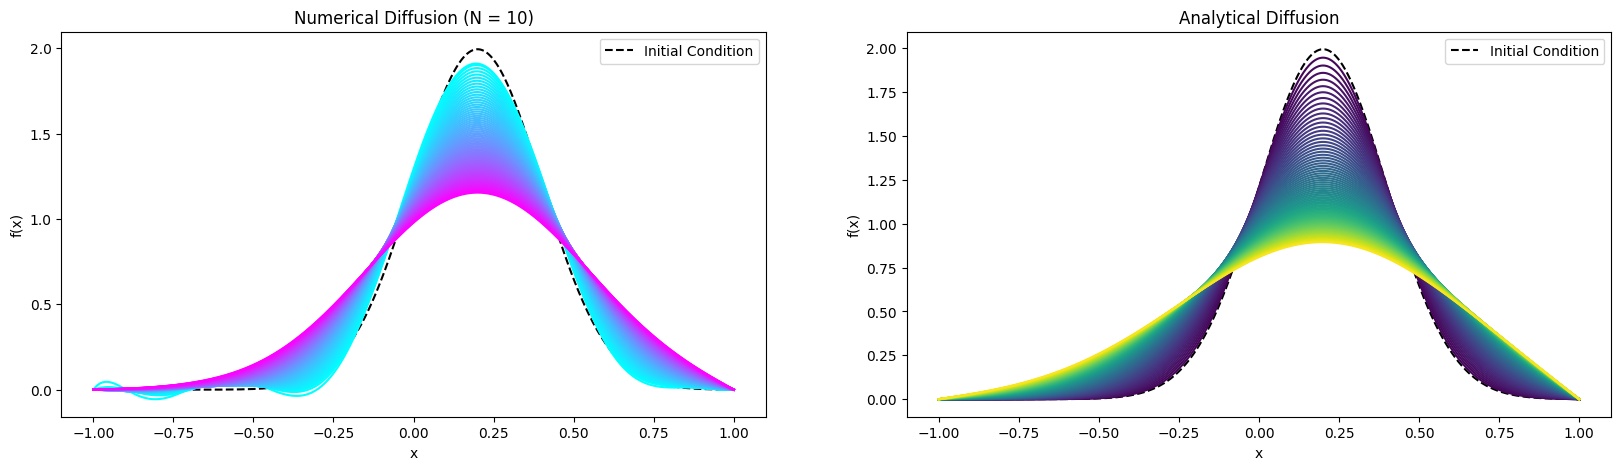

In [18]:
# Plot the results
plt.figure(1, figsize=(20, 5))
plt.subplot(1, 2, 1)

plt.plot(x, f_init, color='black', linestyle = "dashed", label='Initial Condition') # Plot initial function in dashed black
color_list = plt.cm.cool(np.linspace(0, 1, len(f_values)))
for i in range(0, len(f_values)-2, 50):
    plt.plot(x, f_values[i], color=color_list[i])

plt.legend()
plt.title(f'Numerical Diffusion (N = {N - 1})')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(x, f_init, color='black', linestyle = "dashed", label='Initial Condition') # Plot initial function in dashed black
color_list_analytical = plt.cm.viridis(np.linspace(0, 1, len(analytical_values)))
for i in range(50, len(analytical_values)-2, 50):
    plt.plot(x, analytical_values[i], color=color_list_analytical[i])

plt.legend()
plt.title('Analytical Diffusion')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Following this, there are a few ways to calculate the error. It is possible to get the error by comparing the area under each curve, or you could get the error by comparing the pointwise amplitude difference. Also, since each method progresses over a number of timesteps, we could take the max error or the mean error. To compare all of these for the N = 10 scenario shown above, I have calculated each method of error and plotted them below.

In [20]:
### WORK OUT ERROR
def get_area(data_array, dx):
    '''
    This function calculates the area under a curve represented by a 1D numpy array.
    Inputs:
        data_array: a 1D numpy array
        dx: the spacing between data points
    Output:
        area: the area under the curve
    '''
    area = 0
    for i in range(len(data_array)):
        area += data_array[i] * dx
    return area

def get_pointwise_error(f, g):
    '''
    This function calculates the pointwise error between two functions f and g.
    Inputs:
        f: a 1D numpy array
        g: a 1D numpy array
    Output:
        error: a 1D numpy array of length n, where n is the length of f
    '''
    error = np.zeros(len(f))
    for i in range(len(f)):
        error[i] = np.abs(f[i] - g[i])
    return error

mean_area_error_array = []
max_area_error_array = []

mean_pointwise_error_array = []
max_pointwise_error_array = []

for i in range(len(f_values)):
    area_error_array = abs(get_area(f_values[i], dx) - get_area(analytical_values[i], dx))
    mean_area_error_array.append(np.mean(area_error_array))
    max_area_error_array.append(np.max(area_error_array))

    pointwise_error_array = get_pointwise_error(f_values[i], analytical_values[i])
    mean_pointwise_error_array.append(np.mean(pointwise_error_array))
    max_pointwise_error_array.append(np.max(pointwise_error_array))

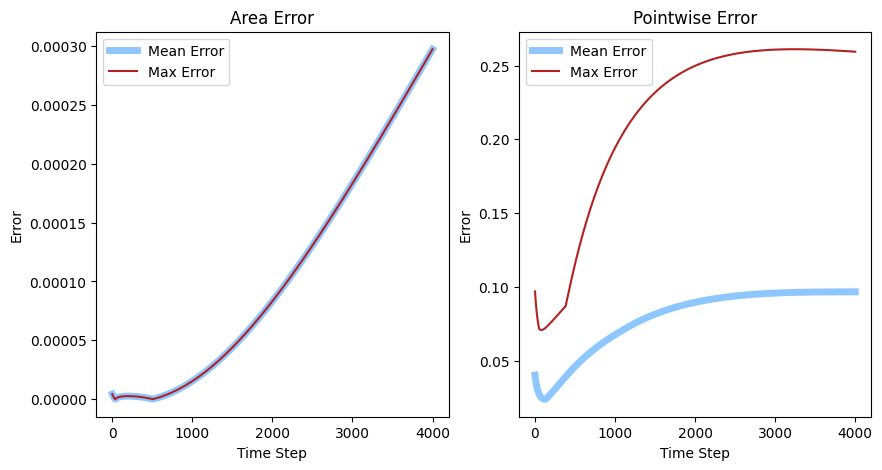

In [34]:
plotting_x = np.arange(1, len(mean_pointwise_error_array)+1)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(plotting_x, mean_area_error_array, color = "dodgerblue", label='Mean Error', linewidth = 5, alpha = 0.5)
plt.plot(plotting_x, max_area_error_array, color = "firebrick", label='Max Error')
plt.title('Area Error')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(plotting_x, mean_pointwise_error_array, color = "dodgerblue", label='Mean Error', linewidth = 5, alpha = 0.5)
plt.plot(plotting_x, max_pointwise_error_array, color = "firebrick", label='Max Error')
plt.title('Pointwise Error')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.legend()

plt.show()

We can see that the area error is the same for both the mean and the max, whereas they differ for the pointwise error. We will select the **mean area error** to compare the analytical and the numerical solutions for multiple values of N.

In [64]:
# PLOT N AGAINST ERROR
N_values = np.arange(10, 28, 2) + 1

# Set parameters
x = np.linspace(-1, 1, 1000)  # Spatial grid
dx = 0.00001  # Spatial step size

mean_area_error_array = []
f_values_array = []
analytical_values_array = []

for N in N_values:
    print(N)
    # Solve the diffusion equation
    f_init, f_values, analytical_values = solve_diffusion_equation(x, dx, N)
    f_values_array.append([f_values])
    analytical_values_array.append([analytical_values])

11


13
15
17
19
21
23
25
27


In [65]:
f_values_array = np.array(f_values_array)
analytical_values_array = np.array(analytical_values_array)

print(f_values_array.shape)
print(analytical_values_array.shape)

mean_area_error_array = []

for n in range(len(N_values)):
    cur_f = f_values_array[n][0]
    cur_analytical = analytical_values_array[n][0]

    cur_mean_area_error_array = []
    for t_step in range(len(cur_f)):
        cur_mean_area_error = np.mean(abs(get_area(cur_f[t_step], dx) - get_area(cur_analytical[t_step], dx)))
        # Check that the overflow errors haven't messed with this
        if cur_mean_area_error > 0.001:
            cur_mean_area_error = cur_mean_area_error_array[-1]

        cur_mean_area_error_array.append(cur_mean_area_error)
    
    mean_area_error_array.append(cur_mean_area_error_array)

mean_area_error_array = np.array(mean_area_error_array)
print(mean_area_error_array.shape)

(9, 1, 4000, 1000)
(9, 1, 4000, 1000)
(9, 4000)


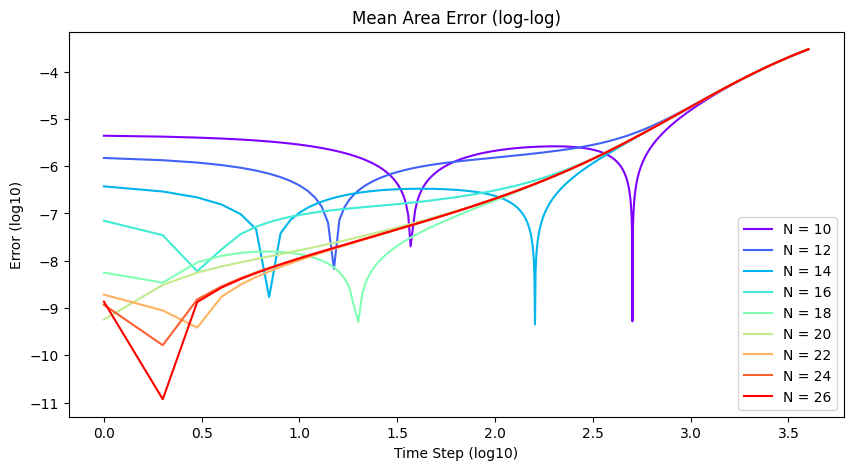

In [72]:
plotting_x = np.arange(1, len(mean_area_error_array[0])+1)

plt.figure(figsize=(10, 5))
color_list = plt.cm.rainbow(np.linspace(0, 1, len(N_values)))
for i in range(0, len(N_values)):
    plt.plot(np.log10(plotting_x), np.log10(mean_area_error_array[i]), color=color_list[i], label=f'N = {N_values[i] - 1}')

plt.title('Mean Area Error (log-log)')
plt.xlabel('Time Step (log10)')
plt.ylabel('Error (log10)')
plt.legend()
plt.show()

We can see from the graph that as the number of Chebyshev coefficients increases, the error stays lower for longer. However, as the number of timesteps increases, the errors converge to the same line. Another thing to notice is that as N increases, the "minimum" error seems to occur earlier. That is, for N = 26, the minimum error trough occurs at very low timesteps, whereas for the N = 10 line, the minima troughs occur at higher timesteps.